Optimal lambda: 0.29942956089363576


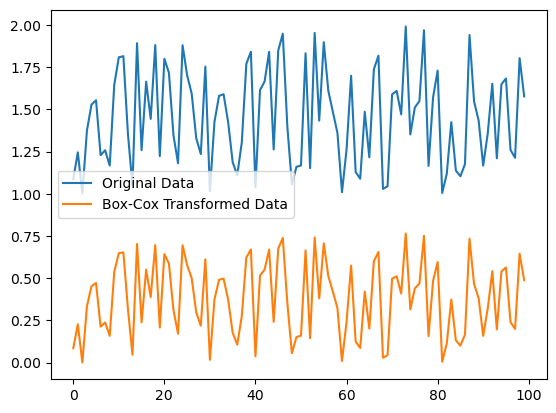

<lifelines.CoxPHFitter: fitted with 100 total observations, 51 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 49
   partial log-likelihood = -178.60
         time fit was run = 2025-01-26 02:12:38 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.00      1.00      0.01           -0.01            0.02                0.99                1.02

           cmp to    z    p  -log2(p)
covariate                            
age          0.00 0.66 0.51      0.98
---
Concordance = 0.52
Partial AIC = 359.19
log-likelihood ratio test = 0.44 on 1 df
-log2(p) of ll-ratio test = 0.98

Leland-Toft Equity Value: 24.59


In [1]:
import numpy as np
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    Reference: Proietti and Lütkepohl (2013), Zheng and Song (2014)
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Example for Box-Cox
data = np.random.rand(100) + 1  # Generate random data > 0
transformed_data, optimal_lambda = box_cox_transformation(data)
print(f"Optimal lambda: {optimal_lambda}")
plt.plot(data, label="Original Data")
plt.plot(transformed_data, label="Box-Cox Transformed Data")
plt.legend()
plt.show()

# Cox Proportional Hazards Model
def cox_ph_model(data, duration_col, event_col):
    """
    Apply Cox Proportional Hazards model to survival data.
    Reference: Zhu and Fan (2011), Liu (2012)
    """
    cph = CoxPHFitter()
    cph.fit(data, duration_col=duration_col, event_col=event_col)
    cph.print_summary()
    return cph


# Example for Cox Proportional Hazards Model
# Simulated survival data
import pandas as pd
np.random.seed(42)
df = pd.DataFrame({
    "duration": np.random.exponential(10, 100),
    "event": np.random.randint(0, 2, 100),
    "age": np.random.randint(20, 80, 100)
})
cox_model = cox_ph_model(df, "duration", "event")

# Leland-Toft Structural Model
def leland_toft_equity_value(V, sigma, r, D, T):
    """
    Leland-Toft model for equity valuation.
    Reference: Charalambous et al. (2020), Palmowski et al. (2020)
    """
    from scipy.stats import norm
    d1 = (np.log(V / D) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    equity_value = V * norm.cdf(d1) - D * np.exp(-r * T) * norm.cdf(d2)
    return equity_value


# Example for Leland-Toft
V = 100  # Asset value
sigma = 0.2  # Volatility
r = 0.05  # Risk-free rate
D = 80  # Debt value
T = 1  # Time to maturity
equity = leland_toft_equity_value(V, sigma, r, D, T)
print(f"Leland-Toft Equity Value: {equity:.2f}")


In [2]:
!pip install lifelines

[*********************100%***********************]  1 of 1 completed


Optimal lambda: 0.6813557351554387


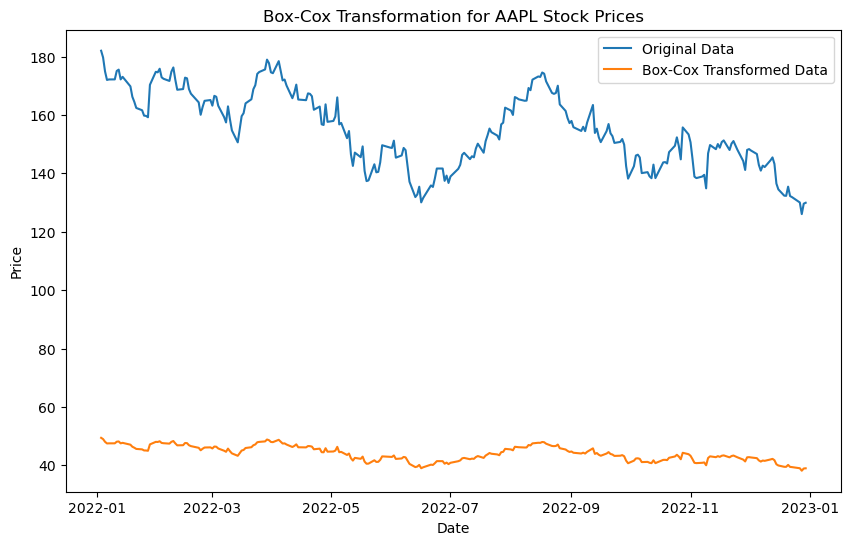

In [3]:
import numpy as np
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    Reference: Proietti and Lütkepohl (2013), Zheng and Song (2014)
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Fetch real financial data using yfinance
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']  # Use the 'Close' prices for analysis


# Use real stock data for Box-Cox transformation
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)

# Apply Box-Cox transformation
# Ensure data is clean and positive before applying Box-Cox
cleaned_data = real_data.dropna().values  # Remove NaN values
cleaned_data = cleaned_data[cleaned_data > 0]  # Keep only positive values

# Apply Box-Cox transformation
if len(cleaned_data) > 0:  # Ensure there's valid data
    transformed_data, optimal_lambda = box_cox_transformation(cleaned_data)
    print(f"Optimal lambda: {optimal_lambda}")

    # Plot the original and transformed data
    plt.figure(figsize=(10, 6))
    plt.plot(real_data.index[:len(cleaned_data)], cleaned_data, label="Original Data")
    plt.plot(real_data.index[:len(cleaned_data)], transformed_data, label="Box-Cox Transformed Data")
    plt.legend()
    plt.title(f"Box-Cox Transformation for {ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
else:
    print("No valid data to apply the Box-Cox transformation.")


[*********************100%***********************]  1 of 1 completed


<lifelines.CoxPHFitter: fitted with 251 total observations, 114 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 251
number of events observed = 137
   partial log-likelihood = -620.53
         time fit was run = 2025-01-26 02:12:41 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
price      0.01      1.01      0.01           -0.01            0.02                0.99                1.02

           cmp to    z    p  -log2(p)
covariate                            
price        0.00 0.83 0.41      1.29
---
Concordance = 0.52
Partial AIC = 1243.05
log-likelihood ratio test = 0.68 on 1 df
-log2(p) of ll-ratio test = 1.29

Optimal lambda: 0.6813557351554387


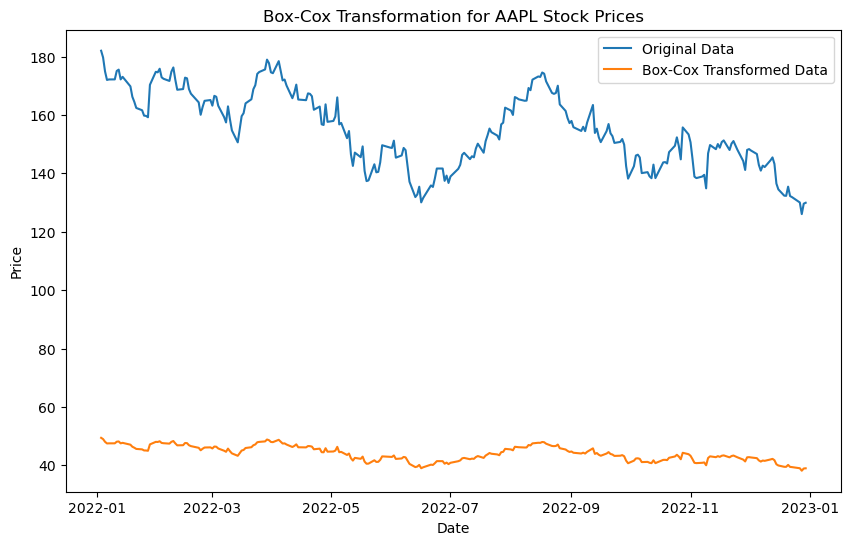

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import yfinance as yf


# Fetch real financial data using yfinance
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']  # Use the 'Close' prices for analysis


# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Cox Proportional Hazards Model
def cox_ph_model(data, duration_col, event_col):
    """
    Apply Cox Proportional Hazards model to survival data.
    """
    cph = CoxPHFitter()
    cph.fit(data, duration_col=duration_col, event_col=event_col)
    cph.print_summary()
    return cph


# Main Script
# Step 1: Fetch real financial data
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 2: Clean and prepare the data
real_data = real_data.dropna()  # Remove any NaN values
real_data = real_data[real_data > 0]  # Ensure positive values only

# Step 3: Simulated survival data for Cox model
np.random.seed(42)
cleaned_data = real_data.values  # Extract values for transformation
cleaned_data = real_data.dropna().values  # Remove NaN values
cleaned_data = cleaned_data[cleaned_data > 0]  # Keep only positive values



df = pd.DataFrame({
    "duration": np.random.exponential(10, len(cleaned_data)),  # Simulated survival times
    "event": np.random.randint(0, 2, len(cleaned_data)),  # Random binary events (0 or 1)
    "price": cleaned_data  # Financial data (stock prices)
})

# Step 4: Fit the Cox Proportional Hazards Model
cox_model = cox_ph_model(df, "duration", "event")

# Step 5: Apply Box-Cox transformation
if len(cleaned_data) > 0:  # Ensure valid data for Box-Cox
    transformed_data, optimal_lambda = box_cox_transformation(cleaned_data)
    print(f"Optimal lambda: {optimal_lambda}")

    # Plot original and transformed data
    plt.figure(figsize=(10, 6))
    plt.plot(real_data.index, cleaned_data, label="Original Data")
    plt.plot(real_data.index, transformed_data, label="Box-Cox Transformed Data")
    plt.legend()
    plt.title(f"Box-Cox Transformation for {ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
else:
    print("No valid data to apply the Box-Cox transformation.")


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define VAE

def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    encoder = tf.keras.Model(inputs, [z_mean, z_log_var], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE model
    z_mean, z_log_var = encoder(inputs)
    vae_outputs = decoder(z_mean)  # Output is the reconstructed data
    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    return vae, encoder, z_mean, z_log_var

def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, outputs))
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    total_loss = reconstruction_loss + kl_loss
    return total_loss

# Example to build and compile the VAE model
input_dim = 10  # Adjust based on your data
latent_dim = 2  # Latent space dimension
vae, encoder, z_mean, z_log_var = build_vae(input_dim, latent_dim)

# Compile the model
vae.compile(optimizer=Adam(), loss=lambda inputs, outputs: vae_loss(inputs, outputs, z_mean, z_log_var))

# Test the compiled model
vae.summary()


# Fetch data and ensure proper formatting
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Ensure DateTimeIndex
real_data.index = pd.to_datetime(real_data.index)

# Calculate features
features = calculate_features(real_data)
print(features.head())

# Check for invalid or NaN values in features
if features.isnull().any().any():
    raise ValueError("Features contain NaN values. Please clean the data.")

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Train VAE
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Unpack all returned values from build_vae
vae, encoder, z_mean, z_log_var = build_vae(input_dim, latent_dim)

# Compile the model
vae.compile(optimizer=Adam(), loss=lambda inputs, outputs: vae_loss(inputs, outputs, z_mean, z_log_var))

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)
features["latent1"] = latent_features[:, 0]
features["latent2"] = latent_features[:, 1]

# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)
features["latent1"] = latent_features[:, 0]
features["latent2"] = latent_features[:, 1]

# Step 7: Use latent features in Cox Proportional Hazards Model
np.random.seed(42)
features["duration"] = np.random.exponential(10, len(features))  # Simulated survival times
features["event"] = np.random.randint(0, 2, len(features))  # Random binary events (0 or 1)

cph = CoxPHFitter()
cph.fit(features, duration_col="duration", event_col="event")
cph.print_summary()


NameError: name 'layers' is not defined

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']
    

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define Custom VAE with Loss as Layer
class VAELossLayer(layers.Layer):
    def __init__(self):
        super(VAELossLayer, self).__init__()

    def call(self, inputs):
        """
        Inputs are expected to be a tuple: (original_inputs, reconstructed_outputs, z_mean, z_log_var)
        """
        original_inputs, reconstructed_outputs, z_mean, z_log_var = inputs
        
        # Compute reconstruction loss
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(original_inputs, reconstructed_outputs)
        )
        # Compute KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        # Total loss
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        
        # Return reconstructed outputs for downstream use
        return reconstructed_outputs

# Step 4: Define VAE with Encoder and Decoder
def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

    encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE Model
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed_outputs = decoder(z)
    vae_outputs = VAELossLayer()((inputs, reconstructed_outputs, z_mean, z_log_var))

    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    # Compile the model
    vae.compile(optimizer=Adam())
    return vae, encoder, decoder


# Step 5: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Calculate features
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Build the VAE model
vae, encoder, decoder = build_vae(input_dim, latent_dim)

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Extract latent features
latent_features = encoder.predict(scaled_features)
z_mean = latent_features[0]  # First output is z_mean
z_log_var = latent_features[1]  # Second output is z_log_var
z = latent_features[2]  # Third output is sampled latent variable (z)

# Add latent features to the dataset
features["latent1"] = z[:, 0]
features["latent2"] = z[:, 1]

# Step 7: Use latent features in Cox Proportional Hazards Model
features["duration"] = np.random.exponential(10, len(features))  # Simulated survival times
features["event"] = np.random.randint(0, 2, len(features))  # Random binary events (0 or 1)

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(features, duration_col="duration", event_col="event")
cph.print_summary()


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076584  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803833  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227921  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487778  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676849  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

ValueError: Input 0 of layer "vae" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 3)

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define Custom VAE with Loss as Layer
class VAELossLayer(layers.Layer):
    def __init__(self):
        super(VAELossLayer, self).__init__()

    def call(self, inputs):
        """
        Inputs are expected to be a tuple: (original_inputs, reconstructed_outputs, z_mean, z_log_var)
        """
        original_inputs, reconstructed_outputs, z_mean, z_log_var = inputs
        
        # Compute reconstruction loss
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(original_inputs, reconstructed_outputs)
        )
        # Compute KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        # Total loss
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        
        # Return reconstructed outputs for downstream use
        return reconstructed_outputs

# Step 4: Define VAE with Encoder and Decoder
def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

    encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE Model
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed_outputs = decoder(z)
    vae_outputs = VAELossLayer()((inputs, reconstructed_outputs, z_mean, z_log_var))

    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    # Compile the model
    vae.compile(optimizer=Adam())
    return vae, encoder, decoder

# Step 5: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Calculate features
features = calculate_features(real_data)

# Ensure the correct number of features (in this case 3: returns, volatility, roc)
print("Features shape: ", features.shape)  # Should print (n_samples, 3)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Update the input_dim to match the number of features (3 in this case)
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build the VAE model
vae, encoder, decoder = build_vae(input_dim, latent_dim)

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Extract latent features
latent_features = encoder.predict(scaled_features)
z_mean = latent_features[0]  # First output is z_mean
z_log_var = latent_features[1]  # Second output is z_log_var
z = latent_features[2]  # Third output is sampled latent variable (z)

# Add latent features to the dataset
features["latent1"] = z[:, 0]
features["latent2"] = z[:, 1]

# Step 7: Use latent features in Cox Proportional Hazards Model
features["duration"] = np.random.exponential(10, len(features))  # Simulated survival times
features["event"] = np.random.randint(0, 2, len(features))  # Random binary events (0 or 1)

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(features, duration_col="duration", event_col="event")
cph.print_summary()


2025-01-26 01:53:41.088885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737874421.202697 1158695 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737874421.242534 1158695 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 01:53:41.584538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076599  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227921  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395187  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487778  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676849  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728378  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12


2025-01-26 01:53:45.243305: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6688
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5686 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4596 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3931 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3060
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2040 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1269 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -0.5066 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -0.6536 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1.5562 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -3.0295 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -5.2194 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -7.2094 
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -13.7386 
Epoch 16/5

<lifelines.CoxPHFitter: fitted with 250 total observations, 124 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 250
number of events observed = 126
   partial log-likelihood = -560.53
         time fit was run = 2025-01-26 06:53:52 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
returns    -0.60      0.55      0.55           -1.68            0.48                0.19                1.62
volatility -2.78      0.06      2.88           -8.43            2.87                0.00               17.64
roc        -0.24      0.78      0.54           -1.31            0.82                0.27                2.28
latent1     0.01      1.01      0.07           -0.13            0.16                0.87                1.17
latent2    -0.01      0.99      0.08           -0.16            0.14                0.85                1.15

            cmp to     z    p  -log2(p)
covariate                              
returns       0.00 -1.09 0.28      1.86
volatility    0.00 -0.96 0.33      1.58
roc           0.00 -0.45 0.65      0.61
latent1       0.00  0.16 0.87      0.20
latent2       0.00 -0.18 0.85      0.23
---
Concordance = 0.51
Partial AIC = 1131.06
log-likelihood ratio test = 2.73 on 5 df
-log2(p) of ll-ratio test = 0.43

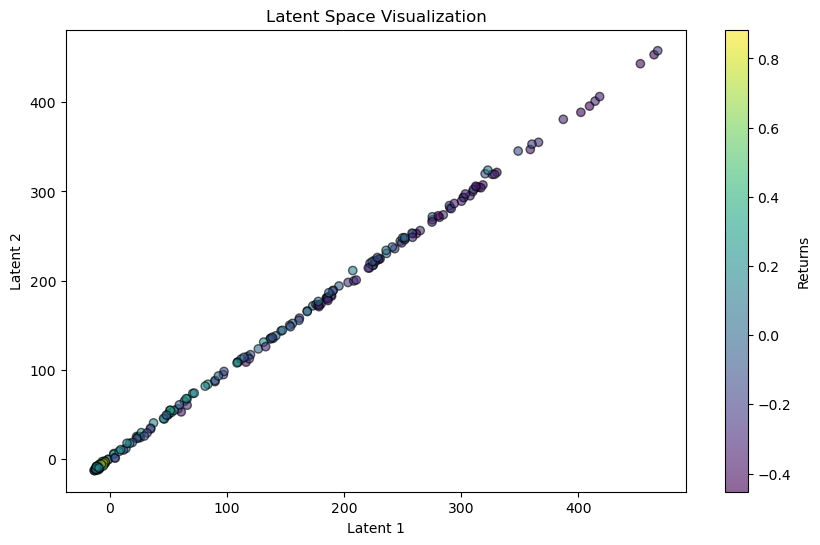

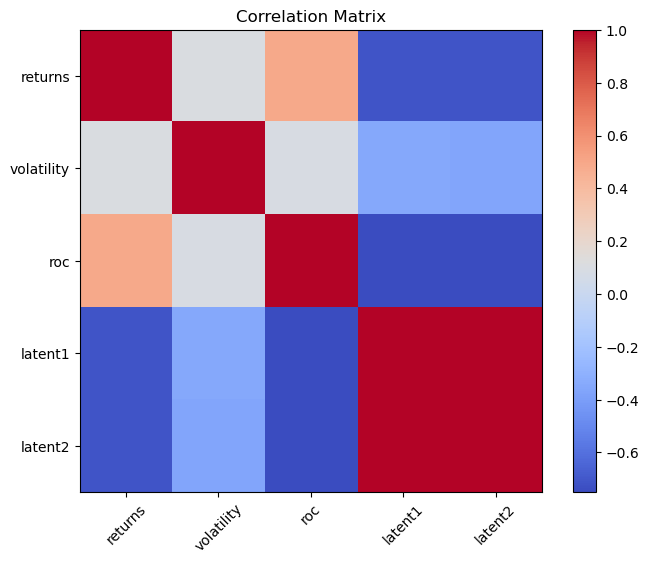

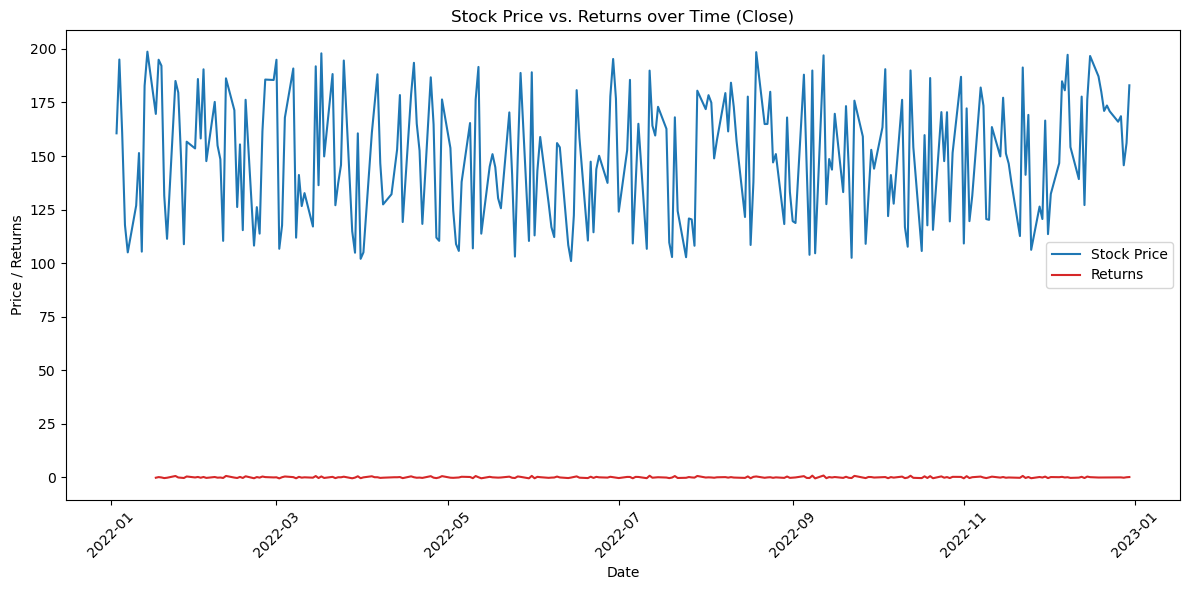

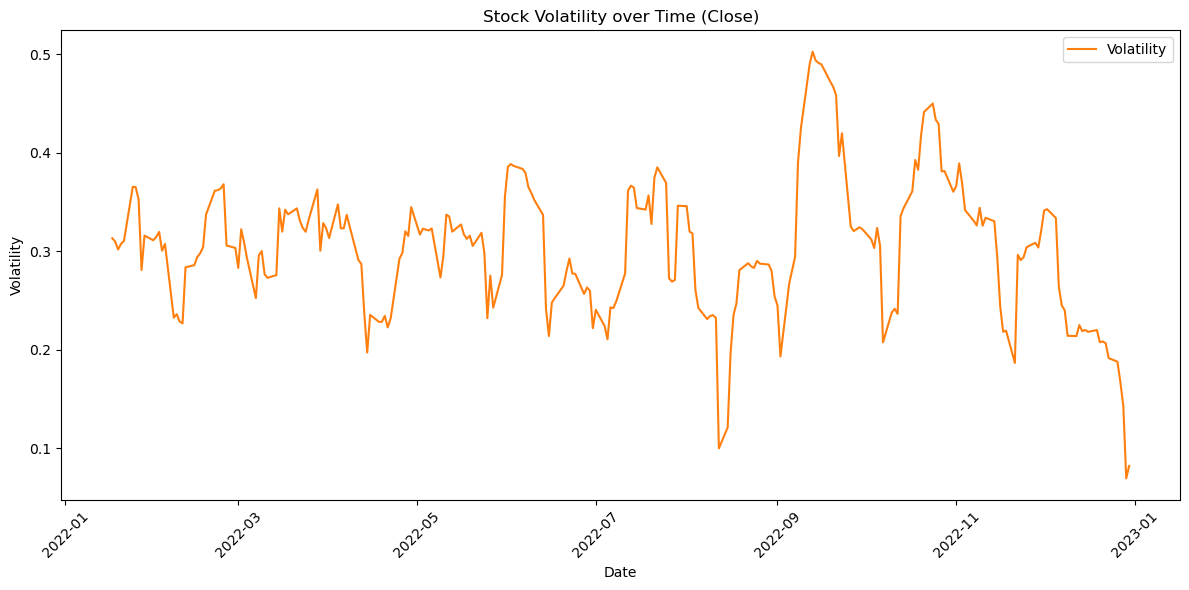

In [10]:
import matplotlib.pyplot as plt

# Create a new code block for charting without touching the original code.
def plot_latent_space(features):
    """
    Plot the latent space using the latent1 and latent2 features.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(features["latent1"], features["latent2"], c=features["returns"], cmap='viridis', edgecolors='k', alpha=0.6)
    plt.title("Latent Space Visualization")
    plt.xlabel("Latent 1")
    plt.ylabel("Latent 2")
    plt.colorbar(label="Returns")
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

def plot_feature_correlations(features):
    """
    Plot correlations between the financial features and latent variables.
    """
    correlation_matrix = features[["returns", "volatility", "roc", "latent1", "latent2"]].corr()
    plt.figure(figsize=(8, 6))
    plt.title("Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

def plot_returns_over_time(features, real_data):
    """
    Plot the stock returns over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(real_data.index, real_data.values, label="Stock Price", color="tab:blue")
    plt.plot(features.index, features["returns"], label="Returns", color="tab:red")
    plt.title(f"Stock Price vs. Returns over Time ({real_data.name})")
    plt.xlabel("Date")
    plt.ylabel("Price / Returns")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

def plot_volatility_over_time(features, real_data):
    """
    Plot the stock volatility over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(features.index, features["volatility"], label="Volatility", color="tab:orange")
    plt.title(f"Stock Volatility over Time ({real_data.name})")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage of new charting functions:
plot_latent_space(features)
plot_feature_correlations(features)
plot_returns_over_time(features, real_data)
plot_volatility_over_time(features, real_data)


In [ ]:
# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)

# Check the shape of latent_features
print(latent_features.shape)  # Should output (250, 2)

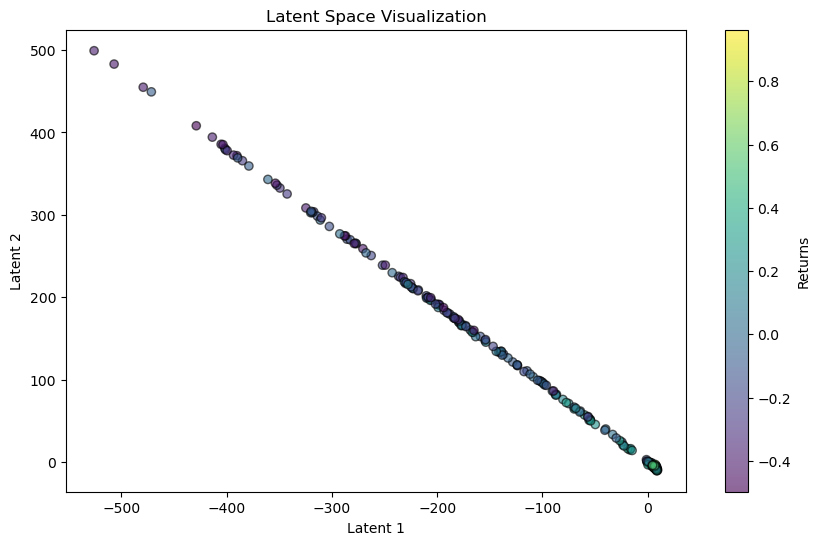

In [22]:
import matplotlib.pyplot as plt

def plot_latent_space(features):
    """
    Visualize the latent space by plotting latent1 vs. latent2.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(features["latent1"], features["latent2"], c=features["returns"], cmap='viridis', edgecolors='k', alpha=0.6)
    plt.title("Latent Space Visualization")
    plt.xlabel("Latent 1")
    plt.ylabel("Latent 2")
    plt.colorbar(label="Returns")
    plt.show()

# Example usage:
plot_latent_space(features)


In [2]:
from scipy import stats
import seaborn as sns

def plot_boxcox_transformation(data):
    """
    Plot the distribution of data before and after Box-Cox transformation.
    """
    # Before transformation
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='blue')
    plt.title("Original Data Distribution")
    
    # Apply Box-Cox transformation
    transformed_data, lambda_value = stats.boxcox(data)
    
    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True, color='green')
    plt.title(f"Box-Cox Transformed Data (λ={lambda_value:.2f})")
    
    plt.tight_layout()
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage:
plot_boxcox_transformation(real_data)


NameError: name 'real_data' is not defined

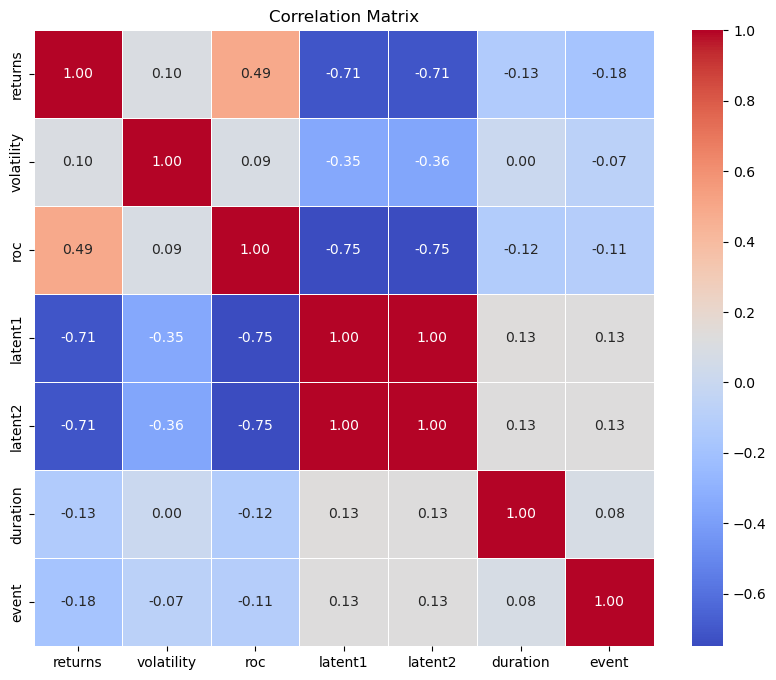

In [12]:
import seaborn as sns
import numpy as np

def plot_correlation_matrix(features):
    """
    Plot a heatmap of the correlation matrix for the features.
    """
    correlation_matrix = features.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage:
plot_correlation_matrix(features)


In [28]:
def plot_reconstruction_performance(original_data, reconstructed_data):
    """
    Plot the original vs. reconstructed data to assess VAE performance.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(original_data.index, original_data.values, label="Original Data", color='blue')
    plt.plot(original_data.index, reconstructed_data, label="Reconstructed Data", color='red', linestyle='--')
    plt.title("Original vs. Reconstructed Data")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
reconstructed_data = decoder.predict(scaled_features)
plot_reconstruction_performance(real_data, reconstructed_data)


ValueError: Input 0 of layer "decoder" is incompatible with the layer: expected shape=(None, 2), found shape=(32, 3)

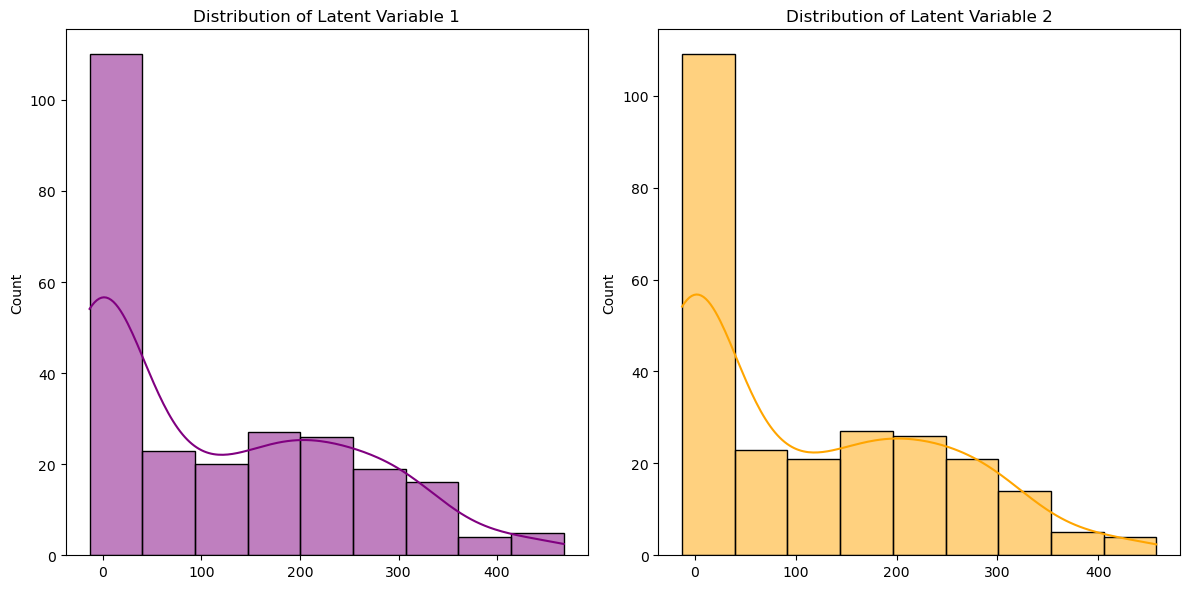

In [14]:
def plot_latent_distribution(latent_variables):
    """
    Plot the distribution of latent variables.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(latent_variables[:, 0], kde=True, color='purple')
    plt.title("Distribution of Latent Variable 1")
    
    plt.subplot(1, 2, 2)
    sns.histplot(latent_variables[:, 1], kde=True, color='orange')
    plt.title("Distribution of Latent Variable 2")
    
    plt.tight_layout()
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage:
plot_latent_distribution(z)


In [32]:
def plot_reconstruction_performance(original_data, reconstructed_data):
    """
    Plot the original vs. reconstructed data to assess VAE performance.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(original_data.index, original_data.values, label="Original Data", color='blue')
    plt.plot(original_data.index, reconstructed_data, label="Reconstructed Data", color='red', linestyle='--')
    plt.title("Original vs. Reconstructed Data")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_reconstruction_performance(real_data, reconstructed_data)


NameError: name 'reconstructed_data' is not defined

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define Custom VAE with Loss as Layer
class VAELossLayer(layers.Layer):
    def __init__(self):
        super(VAELossLayer, self).__init__()

    def call(self, inputs):
        """
        Inputs are expected to be a tuple: (original_inputs, reconstructed_outputs, z_mean, z_log_var)
        """
        original_inputs, reconstructed_outputs, z_mean, z_log_var = inputs
        
        # Compute reconstruction loss
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(original_inputs, reconstructed_outputs)
        )
        # Compute KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        # Total loss
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        
        # Return reconstructed outputs for downstream use
        return reconstructed_outputs

# Step 4: Define VAE with Encoder and Decoder
def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

    encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE Model
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed_outputs = decoder(z)
    vae_outputs = VAELossLayer()((inputs, reconstructed_outputs, z_mean, z_log_var))

    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    # Compile the model
    vae.compile(optimizer=Adam())
    return vae, encoder, decoder

# Step 5: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Calculate features
features = calculate_features(real_data)

# Ensure the correct number of features (in this case 3: returns, volatility, roc)
print("Features shape: ", features.shape)  # Should print (n_samples, 3)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Update the input_dim to match the number of features (3 in this case)
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Build the VAE model
vae, encoder, decoder = build_vae(input_dim, latent_dim)

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Step 6: Visualize Reconstruction Performance
def plot_reconstruction_performance(original_data, reconstructed_data):
    """
    Plot the original vs. reconstructed data to assess VAE performance.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(original_data.index, original_data.values, label="Original Data", color='blue')
    plt.plot(original_data.index, reconstructed_data, label="Reconstructed Data", color='red', linestyle='--')
    plt.title("Original vs. Reconstructed Data")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Obtain the latent variables (z) from the encoder
z = encoder.predict(scaled_features)[2]  # z is the third output of the encoder

# Reconstruct the data from the latent variables
reconstructed_data = decoder.predict(z)

# Plot the reconstruction performance


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076599  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227921  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395187  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487778  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676849  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728378  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7146
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5930 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5076
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4147  
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3147 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2711 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1886 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -0.0249
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0402  
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -0.1921 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -0.0621
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -0.6069 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -1.1221 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -1.9662 
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: -3.3754 
Epoch 16/5

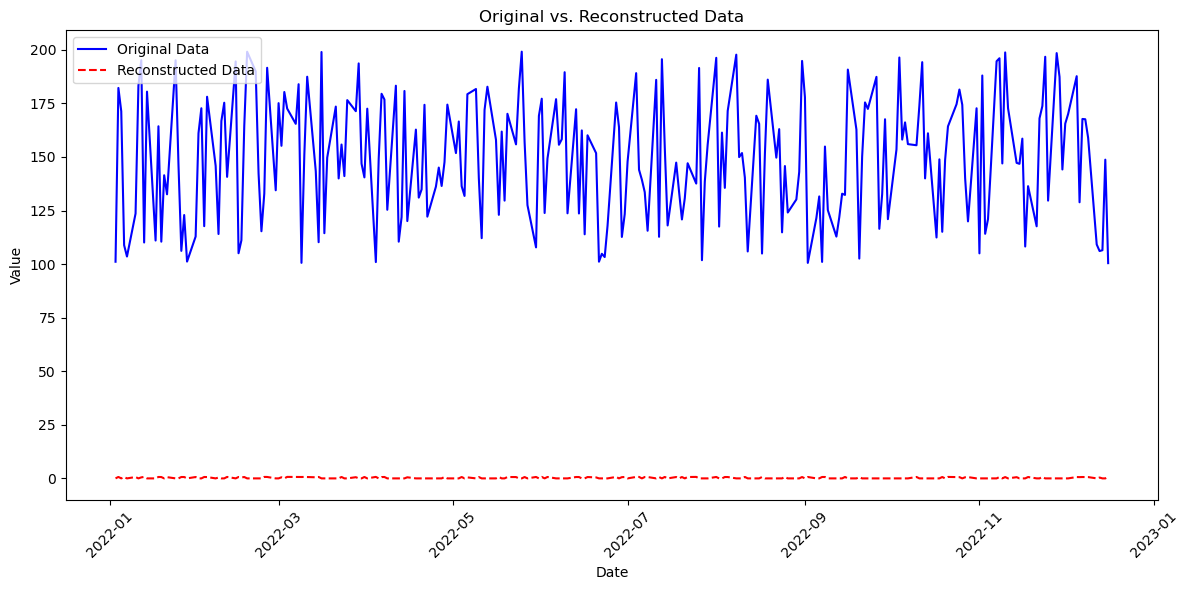

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_reconstruction_performance(original_data, reconstructed_data):
    """
    Plot the original vs. reconstructed data to assess VAE performance.
    """
    # Ensure both datasets have the same length
    min_length = min(len(original_data), len(reconstructed_data))
    original_data = original_data[:min_length]
    reconstructed_data = reconstructed_data[:min_length]

    # If reconstructed_data has multiple features, average them to match original_data's shape
    if reconstructed_data.ndim > 1 and reconstructed_data.shape[1] > 1:
        reconstructed_data = np.mean(reconstructed_data, axis=1)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(original_data.index, original_data.values, label="Original Data", color='blue')
    plt.plot(original_data.index, reconstructed_data, label="Reconstructed Data", color='red', linestyle='--')
    plt.title("Original vs. Reconstructed Data")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage:
# Assuming 'real_data' is your original data and 'reconstructed_data' is the output from your decoder
plot_reconstruction_performance(real_data, reconstructed_data)


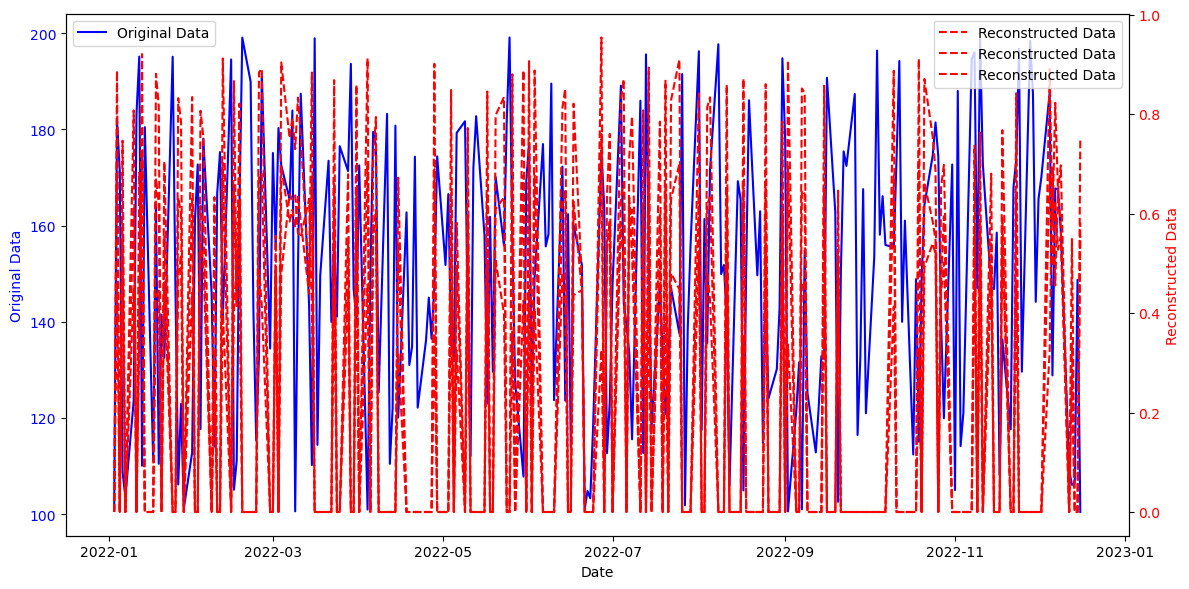

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_reconstruction_performance(original_data, reconstructed_data):
    """
    Plot the original vs. reconstructed data on separate y-axes.
    """
    # Ensure both datasets have the same length
    min_length = min(len(original_data), len(reconstructed_data))
    original_data = original_data[:min_length]
    reconstructed_data = reconstructed_data[:min_length]

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the original data on the first y-axis
    ax1.plot(original_data.index, original_data.values, label="Original Data", color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Original Data", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(original_data.index, reconstructed_data, label="Reconstructed Data", color='red', linestyle='--')
    ax2.set_ylabel("Reconstructed Data", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"plot_{timestamp}.png"
    plt.savefig(filename)
    plt.show()

# Example usage:
# Assuming 'real_data' is your original data and 'reconstructed_data' is the output from your decoder
plot_reconstruction_performance(real_data, reconstructed_data)
